# Introduce the Data

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
os.getcwd()

'C:\\Users\\Irfan'

In [5]:
os.chdir('Datasets')

In [71]:
# Import data and take a look

df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [72]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Let's take a look at the outcome variable: 'income'

In [46]:

print(df['income'].value_counts())

<=50K    3779
>50K     1221
Name: income, dtype: int64


Assign outcome as 0 if income <=50K and as 1 if income >50K

In [47]:

df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]  
df[:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


Assign X as a DataFrame of features and y as a Series of the outcome variable

In [48]:

X = df.drop('income', axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = df['income']

In [49]:
X[:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [50]:
y[:3]

0    0
1    0
2    0
Name: income, dtype: int64

# Basic data cleaning

#  Dealing with data types

- There are three main data types:
- Numeric, e.g. income, age
- Categorical, e.g. gender, nationality
- Ordinal, e.g. low/medium/high

Models can only handle numeric features
- So, we must convert categorical and ordinal features into numeric features
- Create dummy features
- Transform a categorical feature into a set of dummy features, each representing a unique category
- In the set of dummy features, 1 indicates that the observation belongs to that category

Education is a categorical feature:

In [51]:

X['education'].head(5)

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [52]:
X['education'].nunique()

17

In [53]:
X['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', '?',
       'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Use get_dummies in pandas

In [54]:

pd.get_dummies(X['education']).head(5)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,?,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
X["workclass"].value_counts()

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [56]:
X["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay'], dtype=object)

Decide which categorical variables you want to use in model

In [57]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [59]:
X.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
dtype: object

In [60]:

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 8 unique categories
Feature 'education' has 17 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 6 unique categories
Feature 'sex' has 3 unique categories
Feature 'native_country' has 40 unique categories


In [63]:
X['sex'].unique().tolist()

['Male', nan, 'Female']

In [61]:
X['race'].unique().tolist()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', nan, 'Other']

In [62]:
# nunique function ignores the 'nan'

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = X[col_name].nunique()
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 8 unique categories
Feature 'education' has 17 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native_country' has 40 unique categories


Sorting

In [64]:

X['native_country'].value_counts().sort_values(ascending=False).head(10)

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
Germany            22
England            16
Puerto-Rico        16
El-Salvador        16
China              15
Name: native_country, dtype: int64

In this case, bucket low frequecy categories as "Other"

In [65]:

X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: native_country, dtype: int64


Create a list of features to dummy

In [66]:

todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [67]:
X[:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


Function to dummy all the categorical variables used for modeling

In [68]:

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [69]:
X = dummy_df(X, todummy_list)

In [70]:
X[:2]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39.0,77516.0,13.0,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50.0,83311.0,13.0,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [72]:
# X.T

#  Handling missing data
    
Models can not handle missing data

Simplest solutionis to remove observations/features that have missing data

But, removing missing data can introduce a lot of issues
Data is randomly missing: potentially lose a lot of your data
Data is non-randomly missing: in addition to losing data, you are also introducing potential biases    
Usually, this is a poor solution

An alternative solution is to use imputation
- Replace missing value with another value

- Strategies: mean, median, highest frequency value of given feature

In [73]:
# How much of your data is missing?

X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_7th-8th        0
dtype: int64

Impute missing values using Imputer in sklearn.preprocessing

In [74]:

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)

X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

sanity check on missing data

In [76]:

X.isnull().sum().sort_values(ascending=False).head()

native_country_United-States     0
education_Bachelors              0
education_5th-6th                0
education_7th-8th                0
education_9th                    0
dtype: int64

## Distribution of Features

In [ ]:
# A histogram is a simple representation of the distribution of values for a given feature
# X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin
# It is also interesting to look at distributions broken up by outcome categories

In [89]:
# Use pyplot in matplotlib to plot histograms

# %matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='orange') # alpha=0.5
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

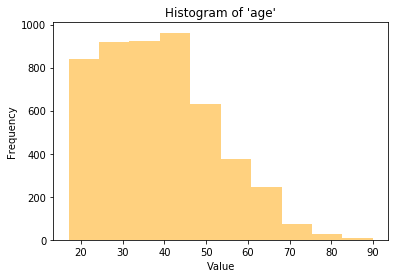

In [90]:
plot_histogram(X['age'])

# Categorical conversions

Define the headers since the data does not have any

In [83]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

Read in the CSV file and convert "?" to NaN

In [84]:
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [85]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [86]:
# df.to_csv('Auto.csv')

In [89]:
# pd.read_csv('Auto.csv', index_col=0)

In [77]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

select type 'object'

In [78]:
obj_col = df.select_dtypes(include=['object'])
obj_col.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [80]:
# obj_col[obj_col.isnull()]

In [82]:
obj_col[obj_col.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


Get the frequency of a feature

In [163]:
obj_col['num_doors'].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

Since the mode is four, let's replace the null values with four

In [164]:
obj_col = obj_col.fillna({'num_doors': 'four'})

# One hot encoding

A one hot encoding is a representation of categorical variables as binary vectors

In [165]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

In [166]:
obj_col['body_style'].value_counts() 

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

Get dummies of "body_style", "drive_wheels" features

In [167]:

pd.get_dummies(obj_col, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()

,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,two,front,dohc,four,mpfi,1,0,0,0,0,0,0,1
1,alfa-romero,gas,std,two,front,dohc,four,mpfi,1,0,0,0,0,0,0,1
2,alfa-romero,gas,std,two,front,ohcv,six,mpfi,0,0,1,0,0,0,0,1
3,audi,gas,std,four,front,ohc,four,mpfi,0,0,0,1,0,0,1,0
4,audi,gas,std,four,front,ohc,five,mpfi,0,0,0,1,0,1,0,0


# Label binarizer

In [168]:

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_col["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [169]:
lb_style.classes_

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='<U11')

# Replacing with numerics

In [170]:
obj_col['num_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_cylinders, dtype: int64

Converting string to numeric using dictionary

In [171]:
cleanup_nums = {"num_doors": {"four":4, "two":2, np.nan:4},
               "num_cylinders": {"two":2 ,"three":3,"four":4 ,"six":6, "five":5, "eight": 8,"twelve":12}}

In [172]:
cleanup_nums

{'num_cylinders': {'eight': 8,
  'five': 5,
  'four': 4,
  'six': 6,
  'three': 3,
  'twelve': 12,
  'two': 2},
 'num_doors': {'four': 4, 'two': 2}}

In [173]:
obj_col.replace(cleanup_nums, inplace=True)

In [174]:
obj_col[:3]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi


Implicit change in the data type of the changed column in observed

In [175]:
obj_col.dtypes

make               object
fuel_type          object
aspiration         object
num_doors           int64
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

# Label Encoder

In [176]:
obj_col["make"].value_counts().head()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: make, dtype: int64

In [92]:
obj_col['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [177]:
lb_make = LabelEncoder()

obj_col["make_code"] = lb_make.fit_transform(obj_col["make"])
obj_col[["make", "make_code"]].head(5)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1


# Custom binary encoding

Use domain knowledge to solve the problem

In [178]:

obj_col['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

implementing np.where function

In [179]:
obj_col["OHC_Code"] = np.where(obj_col["engine_type"].str.contains("ohc"), 1,0)

In [180]:
obj_col[['make','engine_type','OHC_Code']].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


To use OneHotEncoder, we must first convert object to numeric, then apply OneHotEncoder.

Here, 'make_code' column is already encoded using LabelEncoder. Hence used this column directly here.

Since, it involves binary encoding, reshaping and fitting with OneHotEncoder, rather get_dummy is widely used because of simplicity

In [181]:
obj_col["make_code"].nunique()

22

In [ ]:
ohe = OneHotEncoder()
integer_encoded = obj_col["make_code"].values.reshape(len(obj_col["make_code"]), 1)
ohe_results = ohe.fit_transform(integer_encoded)
print(ohe_results)

In [ ]:
import 

In [6]:
dict_cols = {'Store_No1':'str', 'Sales_Type':'str', 'Receipt_No':'str', 'Transaction_No':'int64', 'Item_No':'str', 'Line_No':'int64', 'Price':'float64', 'Quantity':'float64', 'Discount_Amount':'float64', 'Net_Amount':'float64', 'Customer_No': 'str', 'Date': 'str', 'Time': 'str', 'Total_Rounded_Amt':'float64'}

In [19]:
df = pd.read_csv('Dataset_new.csv', index_col=0)

In [20]:
df[:3]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
0,Hyderabad,Take Away,9923,2018-07-31,56,114.0,0.05,119.700000,NaN,NaN,...,Tue,7559.28,143.7,0.832985,0.793319,0,1,0.86,0.91,37307.52
1,Hyderabad,Take Away,4009,2018-07-31,257,529.0,0.05,540.329105,0.027237,1.05,...,Tue,7559.28,143.7,3.760119,3.681280,0,1,0.83,0.91,37307.52
2,Hyderabad,Main Hall,910,2018-07-31,583,190.0,0.05,200.835163,NaN,NaN,...,Tue,7559.28,143.7,1.397600,1.322199,0,1,1.08,1.08,37307.52


In [21]:
df.dtypes

City                                           object
Mapped_Sales_Type                              object
Mapped_Item_Code                                int64
Transaction_Date                               object
Quantity_Sold                                   int64
Median_Price                                  float64
Average_Tax_Percent                           float64
Effective_Price                               float64
Percent_Quantity_With_Discount                float64
Avg_Discount_Percent_On_Discounted_Items      float64
Year                                            int64
Month                                           int64
Day                                            object
Car_sales                                     float64
F_and_B_Inflation                             float64
F_and_B_Inflation_Adjusted_Effective_Price    float64
F_and_B_Inflation_Adjusted_Median_Price       float64
First_Week_Of_The_Month_Dummy                   int64
Last_Week_Of_The_Month_Dummy

In [22]:
df['Mapped_Item_Code'].unique()

array([9923, 4009,  910,  990, 4001, 4010, 4003, 4002, 4006, 4000,  924,
       4011,  923, 4007,  916,  915,  911, 4013, 4008,  909, 4005, 9945,
       4004], dtype=int64)

In [16]:
dict1 = {9923:1, 4009:2, 910:3, 990:4, 4001:5,4010:6, 915:7,916:8, 911:10,923:11,9945:12}

In [26]:
df['Mapped_Item_Code'] = df['Mapped_Item_Code'] + 55

In [28]:
df['Quantity_Sold'] = df['Quantity_Sold'] + 111

In [29]:
df['Median_Price']= df['Median_Price'] + 73

In [30]:
df['Effective_Price'] = df['Effective_Price'] + 44

In [31]:
df[:3]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
0,Hyderabad,Take Away,9978,2018-07-31,167,187.0,0.05,163.700000,NaN,NaN,...,Tue,7559.28,143.7,0.832985,0.793319,0,1,0.86,0.91,37307.52
1,Hyderabad,Take Away,4064,2018-07-31,368,602.0,0.05,584.329105,0.027237,1.05,...,Tue,7559.28,143.7,3.760119,3.681280,0,1,0.83,0.91,37307.52
2,Hyderabad,Main Hall,965,2018-07-31,694,263.0,0.05,244.835163,NaN,NaN,...,Tue,7559.28,143.7,1.397600,1.322199,0,1,1.08,1.08,37307.52


In [32]:
df.to_csv('Dataset_new1.csv')

In [36]:
df[:3]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
0,Hyderabad,Take Away,9978,2018-07-31,167,187.0,0.05,163.700000,NaN,NaN,...,Tue,7559.28,143.7,0.832985,0.793319,0,1,0.86,0.91,37307.52
1,Hyderabad,Take Away,4064,2018-07-31,368,602.0,0.05,584.329105,0.027237,1.05,...,Tue,7559.28,143.7,3.760119,3.681280,0,1,0.83,0.91,37307.52
2,Hyderabad,Main Hall,965,2018-07-31,694,263.0,0.05,244.835163,NaN,NaN,...,Tue,7559.28,143.7,1.397600,1.322199,0,1,1.08,1.08,37307.52


In [33]:
df['Mapped_Item_Code'] = df['Mapped_Item_Code'].astype(str)

In [37]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [39]:
df = df.loc[(df['Transaction_Date'] >= '2016-08-01'), :]

In [40]:
df.columnsumns

Index(['City', 'Mapped_Sales_Type', 'Mapped_Item_Code', 'Transaction_Date',
       'Quantity_Sold', 'Median_Price', 'Average_Tax_Percent',
       'Effective_Price', 'Percent_Quantity_With_Discount',
       'Avg_Discount_Percent_On_Discounted_Items', 'Year', 'Month', 'Day',
       'Car_sales', 'F_and_B_Inflation',
       'F_and_B_Inflation_Adjusted_Effective_Price',
       'F_and_B_Inflation_Adjusted_Median_Price',
       'First_Week_Of_The_Month_Dummy', 'Last_Week_Of_The_Month_Dummy',
       'Day_Of_The_Week_Seasonality', 'Month_Of_The_Year_Seasonality',
       'Two_Wheeler_sales'],
      dtype='object')

In [41]:
df['Mapped_Sales_Type'].unique()

array(['Take Away', 'Main Hall', 'Express', 'Delivery', 'Dine-in', 'Bakery'], dtype=object)

In [44]:
# df['Avg_Discount_Percent_On_Discounted_Items'] = np.where(df['P*Q'].notnull(), (df['Discount_Amount']/df['P*Q'])*df['Tax%'] , np.nan )

In [45]:
df = df.loc[df['Avg_Discount_Percent_On_Discounted_Items'] < 1.0, :]

In [47]:
df.loc[df['Avg_Discount_Percent_On_Discounted_Items'] >= 1.0]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales


In [48]:
dict_aggr1 = {'Quantity_Sold':'sum', 'Median_Price':'median', 'Effective_Price':'median'}

In [50]:
df_agg = df.groupby(['City', 'Mapped_Sales_Type', 'Mapped_Item_Code', 'Transaction_Date']).agg(dict_aggr1).reset_index()

In [51]:
df_agg[:3]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Effective_Price
0,Hyderabad,Bakery,4059,2018-06-14,109,359.0,314.27
1,Hyderabad,Bakery,4060,2018-06-14,110,378.0,332.22
2,Hyderabad,Bakery,4063,2018-06-14,110,732.0,666.76


In [53]:
df.loc[df['Median_Price'].isnull()]

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales


In [55]:
df.loc[df['Effective_Price'].notnull()].head()

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
5,Hyderabad,Delivery,4056,2018-07-31,617,322.0,0.05,305.354585,0.003953,0.105020,...,Tue,7559.28,143.7,1.818751,1.732777,0,1,0.82,1.06,37307.52
10,Hyderabad,Delivery,4061,2018-07-31,144,942.0,0.05,942.631515,0.151515,0.105006,...,Tue,7559.28,143.7,6.253525,6.047321,0,1,0.75,1.06,37307.52
20,Hyderabad,Dine-in,966,2018-07-31,1250,392.0,0.05,378.840053,0.003512,0.105008,...,Tue,7559.28,143.7,2.330133,2.219903,0,1,0.92,1.09,37307.52
24,Hyderabad,Dine-in,965,2018-07-31,1934,362.0,0.05,347.258327,0.001646,0.420000,...,Tue,7559.28,143.7,2.110357,2.011134,0,1,0.89,1.09,37307.52
26,Hyderabad,Delivery,4068,2018-07-31,148,622.0,0.05,618.898649,0.027027,0.105009,...,Tue,7559.28,143.7,4.000686,3.820459,0,1,0.64,1.06,37307.52


In [60]:
df.loc[(df['City'] == 'Hyderabad') & (df['Mapped_Sales_Type'] == 'Delivery'), :].head()

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
5,Hyderabad,Delivery,4056,2018-07-31,617,322.0,0.05,305.354585,0.003953,0.105020,...,Tue,7559.28,143.7,1.818751,1.732777,0,1,0.82,1.06,37307.52
10,Hyderabad,Delivery,4061,2018-07-31,144,942.0,0.05,942.631515,0.151515,0.105006,...,Tue,7559.28,143.7,6.253525,6.047321,0,1,0.75,1.06,37307.52
26,Hyderabad,Delivery,4068,2018-07-31,148,622.0,0.05,618.898649,0.027027,0.105009,...,Tue,7559.28,143.7,4.000686,3.820459,0,1,0.64,1.06,37307.52
42,Hyderabad,Delivery,4058,2018-07-31,532,272.0,0.05,252.660214,0.014252,0.105008,...,Tue,7559.28,143.7,1.452054,1.384830,0,1,0.72,1.06,37307.52
46,Hyderabad,Delivery,4064,2018-07-31,261,682.0,0.05,683.031933,0.006667,0.105008,...,Tue,7559.28,143.7,4.446986,4.237996,0,1,0.76,1.06,37307.52


In [62]:
df.loc[df['Day'].isin(['Mon', 'Tue']), :].head()

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
5,Hyderabad,Delivery,4056,2018-07-31,617,322.0,0.05,305.354585,0.003953,0.105020,...,Tue,7559.28,143.7,1.818751,1.732777,0,1,0.82,1.06,37307.52
10,Hyderabad,Delivery,4061,2018-07-31,144,942.0,0.05,942.631515,0.151515,0.105006,...,Tue,7559.28,143.7,6.253525,6.047321,0,1,0.75,1.06,37307.52
20,Hyderabad,Dine-in,966,2018-07-31,1250,392.0,0.05,378.840053,0.003512,0.105008,...,Tue,7559.28,143.7,2.330133,2.219903,0,1,0.92,1.09,37307.52
24,Hyderabad,Dine-in,965,2018-07-31,1934,362.0,0.05,347.258327,0.001646,0.420000,...,Tue,7559.28,143.7,2.110357,2.011134,0,1,0.89,1.09,37307.52
26,Hyderabad,Delivery,4068,2018-07-31,148,622.0,0.05,618.898649,0.027027,0.105009,...,Tue,7559.28,143.7,4.000686,3.820459,0,1,0.64,1.06,37307.52


In [64]:
df.loc[df['Percent_Quantity_With_Discount'] != 0.0, :].head()

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
5,Hyderabad,Delivery,4056,2018-07-31,617,322.0,0.05,305.354585,0.003953,0.105020,...,Tue,7559.28,143.7,1.818751,1.732777,0,1,0.82,1.06,37307.52
10,Hyderabad,Delivery,4061,2018-07-31,144,942.0,0.05,942.631515,0.151515,0.105006,...,Tue,7559.28,143.7,6.253525,6.047321,0,1,0.75,1.06,37307.52
20,Hyderabad,Dine-in,966,2018-07-31,1250,392.0,0.05,378.840053,0.003512,0.105008,...,Tue,7559.28,143.7,2.330133,2.219903,0,1,0.92,1.09,37307.52
24,Hyderabad,Dine-in,965,2018-07-31,1934,362.0,0.05,347.258327,0.001646,0.420000,...,Tue,7559.28,143.7,2.110357,2.011134,0,1,0.89,1.09,37307.52
26,Hyderabad,Delivery,4068,2018-07-31,148,622.0,0.05,618.898649,0.027027,0.105009,...,Tue,7559.28,143.7,4.000686,3.820459,0,1,0.64,1.06,37307.52


In [63]:
df.columns

Index(['City', 'Mapped_Sales_Type', 'Mapped_Item_Code', 'Transaction_Date',
       'Quantity_Sold', 'Median_Price', 'Average_Tax_Percent',
       'Effective_Price', 'Percent_Quantity_With_Discount',
       'Avg_Discount_Percent_On_Discounted_Items', 'Year', 'Month', 'Day',
       'Car_sales', 'F_and_B_Inflation',
       'F_and_B_Inflation_Adjusted_Effective_Price',
       'F_and_B_Inflation_Adjusted_Median_Price',
       'First_Week_Of_The_Month_Dummy', 'Last_Week_Of_The_Month_Dummy',
       'Day_Of_The_Week_Seasonality', 'Month_Of_The_Year_Seasonality',
       'Two_Wheeler_sales'],
      dtype='object')

In [65]:
df['Range'] = np.where(df['Effective_Price']>500, 'High', 'Average')

In [66]:
df.head()

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales,Range
5,Hyderabad,Delivery,4056,2018-07-31,617,322.0,0.05,305.354585,0.003953,0.105020,...,7559.28,143.7,1.818751,1.732777,0,1,0.82,1.06,37307.52,Average
10,Hyderabad,Delivery,4061,2018-07-31,144,942.0,0.05,942.631515,0.151515,0.105006,...,7559.28,143.7,6.253525,6.047321,0,1,0.75,1.06,37307.52,High
20,Hyderabad,Dine-in,966,2018-07-31,1250,392.0,0.05,378.840053,0.003512,0.105008,...,7559.28,143.7,2.330133,2.219903,0,1,0.92,1.09,37307.52,Average
24,Hyderabad,Dine-in,965,2018-07-31,1934,362.0,0.05,347.258327,0.001646,0.420000,...,7559.28,143.7,2.110357,2.011134,0,1,0.89,1.09,37307.52,Average
26,Hyderabad,Delivery,4068,2018-07-31,148,622.0,0.05,618.898649,0.027027,0.105009,...,7559.28,143.7,4.000686,3.820459,0,1,0.64,1.06,37307.52,High


In [ ]:
t1 = pd.read_csv('Dataset_new1.csv')

In [70]:
t1.head()

,Unnamed: 0,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
0,0,Hyderabad,Take Away,9978,2018-07-31,167,187.0,0.05,163.700000,NaN,...,Tue,7559.28,143.7,0.832985,0.793319,0,1,0.86,0.91,37307.52
1,1,Hyderabad,Take Away,4064,2018-07-31,368,602.0,0.05,584.329105,0.027237,...,Tue,7559.28,143.7,3.760119,3.681280,0,1,0.83,0.91,37307.52
2,2,Hyderabad,Main Hall,965,2018-07-31,694,263.0,0.05,244.835163,NaN,...,Tue,7559.28,143.7,1.397600,1.322199,0,1,1.08,1.08,37307.52
3,3,Hyderabad,Express,9978,2018-07-31,140,263.0,0.05,243.500000,NaN,...,Tue,7559.28,143.7,1.388309,1.322199,0,1,0.78,0.08,37307.52
4,4,Hyderabad,Express,1045,2018-07-31,139,392.0,0.05,378.960000,NaN,...,Tue,7559.28,143.7,2.330967,2.219903,0,1,0.73,0.08,37307.52
